<a href="https://colab.research.google.com/github/MavClarito/Emerging-Tech-1/blob/main/Group_2_Activity_5_Line_and_Circle_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | Casidsid, Judd Amiel
| Castillo, Mark Laurence
| Clarito, Vincent Maverick
**Section** | CPE31S2
**Date Performed**: | 9/19/2023
**Date Submitted**: |
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

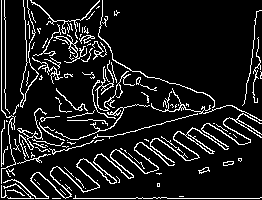

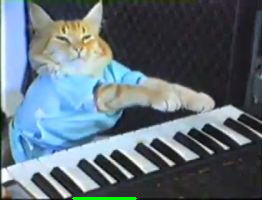

In [ ]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 3
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?

**Ans: The "minLineLength = 20" is repsonsible for setting the minimum line length.**

2. What is the mathematical formula for Hough transform and explain how it finds lines.

**ρ=x⋅cos(θ)+y⋅sin(θ) is the mathematical formula for getting the Hough transform. Hough Transform finds lines in an image by converting the problem into a parameter space and looking for peaks in an accumulator array that represent lines in the original image. It's a powerful technique for detecting lines, even when they are partially obscured or not perfectly straight.**

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

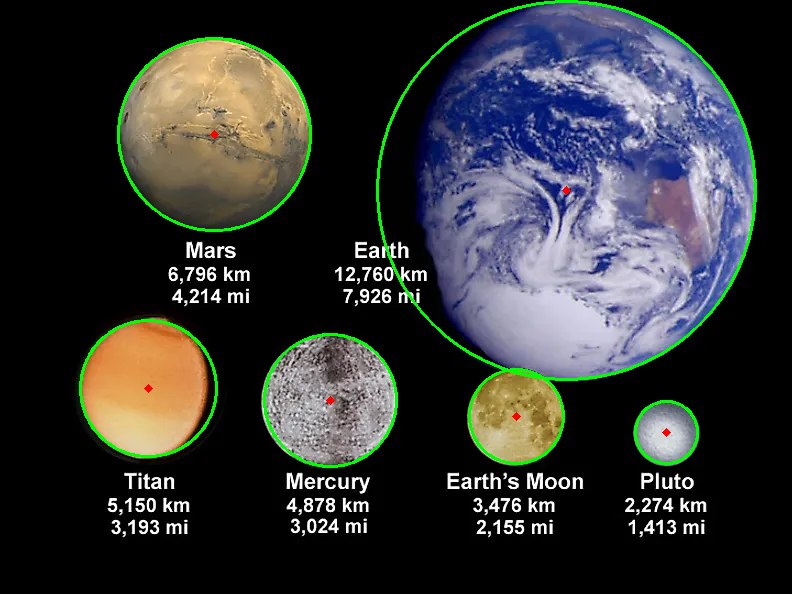

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 31

planets = cv2.imread('/content/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

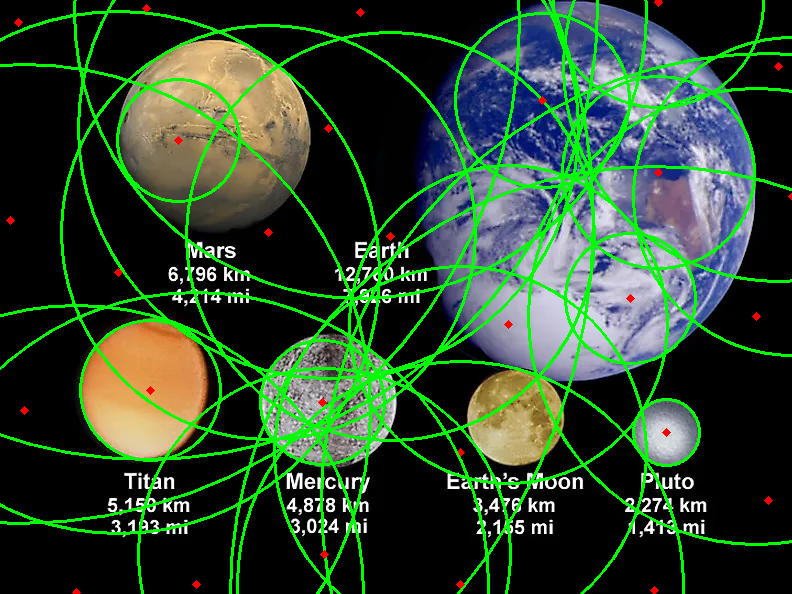

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 5

planets = cv2.imread('/content/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)


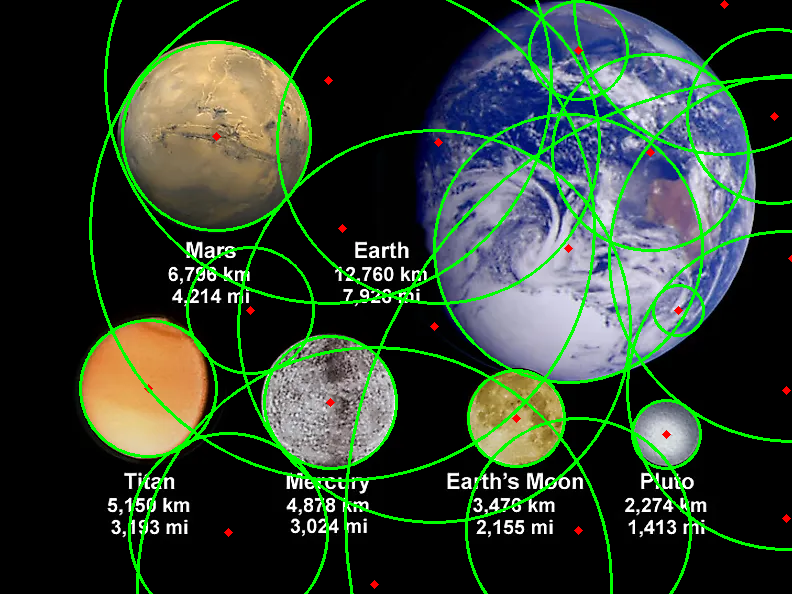

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 9

planets = cv2.imread('/content/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)


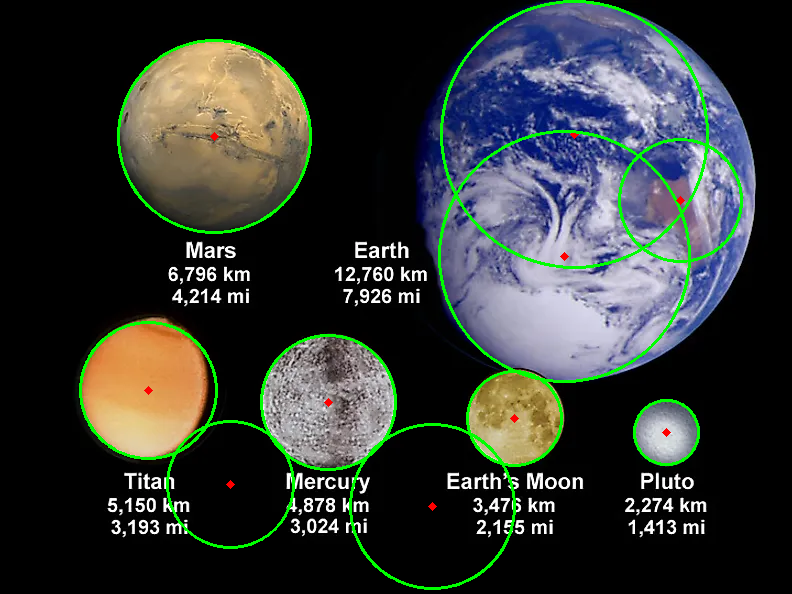

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 15

planets = cv2.imread('/content/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)


What happens to the code once you run **and the value of n is 5**?

**ANS: Nothing happened to the code although the output changed. It became less sensity as we decrease the value of the "n".**

Change the value to 9, **what happens to the image**?

**ANS: The image has less visible circles.**

Lastly, change the value to 15, **what can you say about the resulting image?**

**ANS: It is far better than the 2 previous values although there are still unnecessary circles or the object's circular outline wasn't drawn.**

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

**ANS: The code processes an image with a varying median blur parameter (n) to reduce noise and enhance circle detection. Larger n values result in smoother images but may blur fine details, whereas smaller n values preserve more details but can capture noise.**

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

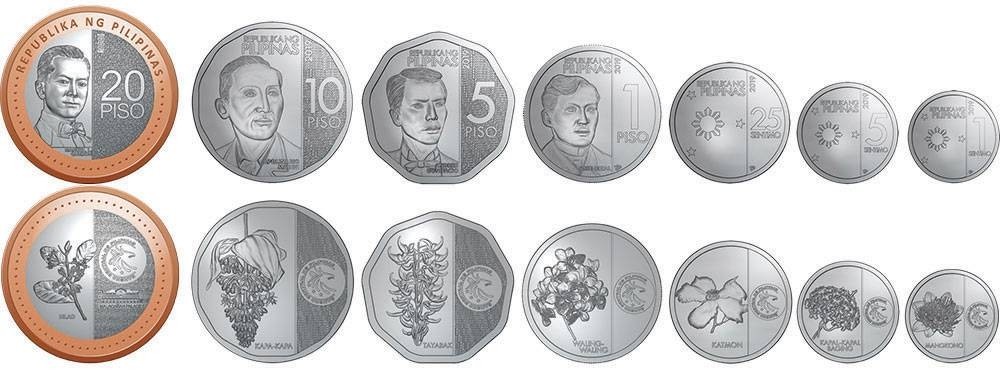

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.
# --------------------------------------------------------------------------------------------------------------------
- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?

**Ans: As the name stated you cannot use "houghlines" to count circles since it's designed for detecting straight lines and not image.**

# --------------------------------------------------------------------------------------------------------------------
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

**Ans: Yes, "houghcircles" function is used for detecting circles or any circular object from images to videos.**


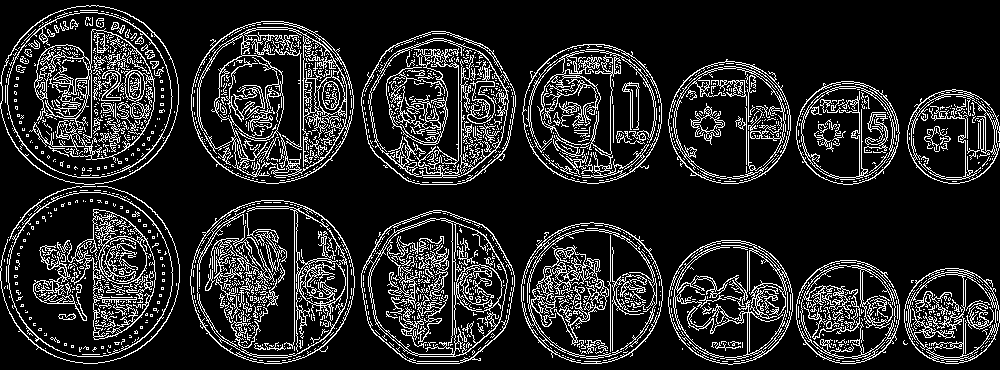

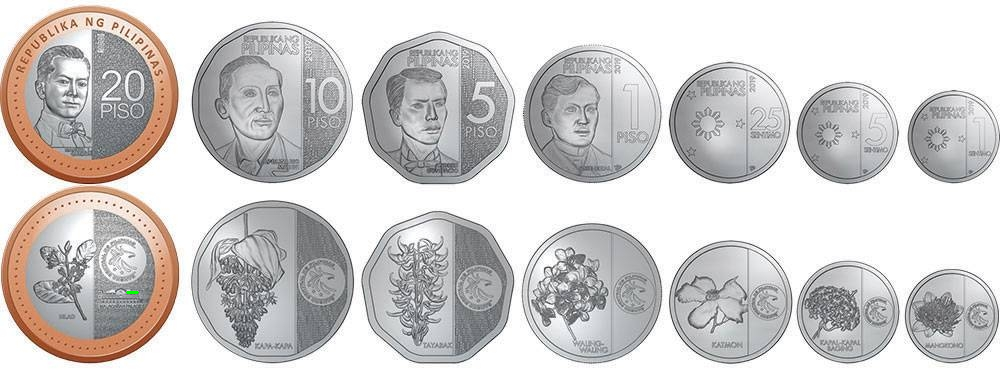

Number of coins detected: 16


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_and_display_lines(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 120)
    minLineLength = 20
    maxLineGap = 5
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)

    if lines is not None:
        for x1, y1, x2, y2 in lines[0]:
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2_imshow(edges)
        cv2_imshow(img)
        num_coins = len(circles[0])
        return num_coins
    else:
        print("There are no lines here. Try again :) ")
        return 0

image_path = '/content/piso.jpg'
detect_and_display_lines(image_path)
print(f'Number of coins: {num_coins}')


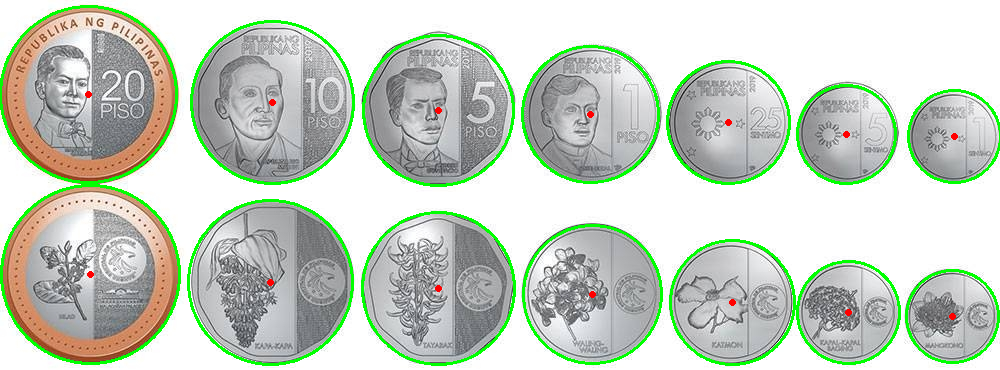

Number of coins: 16


In [ ]:
def detect_and_display_circles(image_path, n=29):
    piso = cv2.imread(image_path)
    gray_img = cv2.cvtColor(piso, cv2.COLOR_BGR2GRAY)
    img = cv2.medianBlur(gray_img, n)
    cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 90,
                               param1=100, param2=30, minRadius=0, maxRadius=0)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(piso, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(piso, (i[0], i[1]), 2, (0, 0, 255), 2)
        cv2.imwrite("piso_circles.jpg", piso)
        cv2_imshow(piso)
        num_coins = len(circles[0])
        return num_coins
    else:
        print("There are no circles here. Try again :)")
        return 0
image_path = '/content/piso.jpg'
detect_and_display_circles(image_path)
print(f'Number of coins: {num_coins}')


According to our understanding of the code the "n = 29" in this variable
 it is used in the median blur operation. A median blur is a type of filter that is used to reduce unnecessary pixel and makes it easier to detect an object.

This code "(num_coins = len(circles[0])
        return num_coins" will count and attempt and return the number of coins detected in a circle.

## 5. Summary, Conclusions and Lessons Learned


**Casidsid:** Upon doing this activity, I learned that methods for detecting lines and circles makes it possible to extract crucial geometric elements from pictures for a variety of uses. These techniques give programmers the ability to decipher and comprehend visual data, which makes them indispensable for expanding the capabilities of different image processing.

**Castillo:** In previous lessons we learned in detecting edges and contours, today we learned how to detect lines and circles, if we can register a pattern in the program we can detect shapes and items from the images processed.

**Clarito:** I have concluded that learning this is important especially for technologies that involves cameras which can be used for gathering data. I have learned or realized how today's technology tracks an object's movement.



<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*